# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


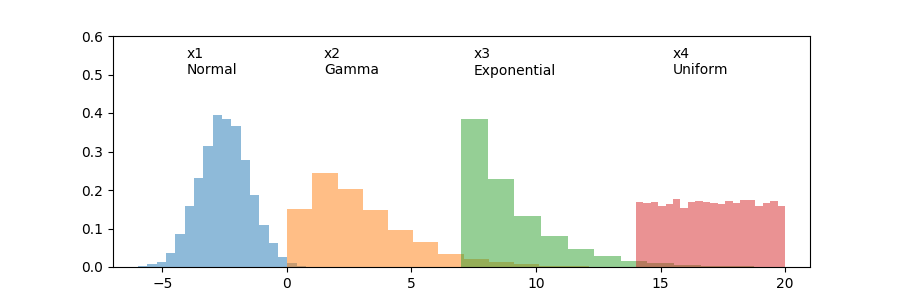

In [28]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')

plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


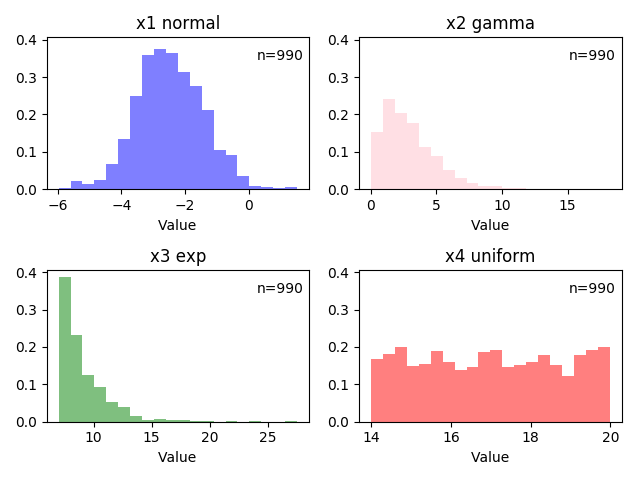

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def update(curr, *graphs):
    # increase 20 at a time    
    samples_to_draw = 10 * curr
    if samples_to_draw > max_samples:
        a.event_source.stop()
        return
    
    # redraw
    for n in graphs:
        #import pdb; pdb.set_trace() 
        dr  = n["axes"]
        data = n["data"]
        title = n["title"]
        bins = n["bins"]
        color = n["color"]
        dr.cla()
        dr.set_title("{}".format(title))
        dr.hist(data[:samples_to_draw], normed=True, bins=20, alpha=0.5, color=color)
        dr.set_xlabel('Value')
        # annotate at the top of the figure
        dr.annotate("n={}".format(samples_to_draw), xy=(0.80, 0.85), xycoords='axes fraction')
        
    plt.tight_layout()
    
#Creates an animation, pulling between 100 and 1000 samples from each of the random variables (x1, x2, x3, x4) for each plot and plotting this as we did in the lecture on animation.
plt.figure(1)

min_samples = 100
max_samples = 1000
f, ((ax1, ax2), (ax3, ax4) ) = plt.subplots(nrows=2, ncols=2,sharey = True)
bins1 = np.arange(-7.5, 2.5, 0.2)
bins2 = np.arange(0, 10, 0.2)
bins3 = np.arange(7, 17, 0.2)
bins4 = np.arange(12, 22, 0.2)



params = (
                                    {"axes":ax1, "data":x1, "title":"x1 normal", "color":"blue", "bins":bins1},
                                    {"axes":ax2, "data":x2, "title":"x2 gamma", "color":"pink","bins":bins2},
                                    {"axes":ax3, "data":x3, "title":"x3 exp", "color":"green","bins":bins3},
                                    {"axes":ax4, "data":x4, "title":"x4 uniform", "color":"red","bins":bins4}
                               
                                 )

a = animation.FuncAnimation(f, update, interval=100, fargs=(params))
a

    

In [30]:
filename= 'animation.mp4'
a.save(filename)
from IPython.display import HTML
link = '<a href="{0}" >Click here to download {0}</a>'
HTML(link.format(filename))

/opt/conda/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)
/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6198: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
